<a href="https://colab.research.google.com/github/diefrein/hse-ml/blob/develop/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
# Задание 1

# Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
random_rows = df_train.sample(10)
print("10 случайных строк:")
print(random_rows)

# Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
print("первые 5:")
print(df_test.head(5))
print("последние 5:")
print(df_test.tail(5))

# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
print("названия колонок, для которых есть пропущенные значения:")
print(df_train.columns[df_train.isna().any()].tolist())

# Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
print("Число дубликатов:", df_train.duplicated().sum())
df_train = df_train.drop_duplicates()

# Постройте дашборд, используя ydata-profilling (0.15 балла)
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df_train, title="Profiling Report")
#profile

# Задание 3 (0.25 балла)
df_train['mileage'] = df_train['mileage'].replace(r'\D+', '', regex=True).astype('float')
df_train['engine'] = df_train['engine'].replace(r'\D+', '', regex=True).astype('float')

#df_train = df_train[df_train['max_power'].replace(r'\D+', '', regex=True) != '']
df_train['max_power'] = df_train['max_power'].replace(r'\D+', '', regex=True)
df_train['max_power'] = df_train['max_power'].replace('', None).astype('float')
df_train = df_train.drop('torque', axis=1)

df_test['mileage'] = df_test['mileage'].replace(r'\D+', '', regex=True).astype('float')
df_test['engine'] = df_test['engine'].replace(r'\D+', '', regex=True).astype('float')

#df_test = df_test[df_test['max_power'].replace(r'\D+', '', regex=True) != '']
df_test['max_power'] = df_test['max_power'].replace(r'\D+', '', regex=True)
df_test['max_power'] = df_test['max_power'].replace('', None).astype('float')
df_test = df_test.drop('torque', axis=1)

10 случайных строк:
                                 name  year  selling_price  km_driven    fuel  \
5691    Mahindra Scorpio VLX 2WD BSIV  2012         750000     120000  Diesel   
4086     Mahindra TUV 300 mHAWK100 T8  2018         819999      11500  Diesel   
3113      Mahindra XUV500 W11 AT BSIV  2019        1650000      25000  Diesel   
6929       Maruti Gypsy King Soft Top  1997         300000     186388  Petrol   
5374                  Maruti Alto LXi  2012         185000      60000  Petrol   
3230               Toyota Etios 1.5 V  2011         285000      45500  Petrol   
1574  Toyota Fortuner 2.8 4WD AT BSIV  2018        3200000      60000  Diesel   
118                     Lexus ES 300h  2019        5150000      20000  Petrol   
1862            Hyundai i20 1.2 Spotz  2018         610000      15000  Petrol   
1144              Mahindra Marazzo M6  2018        1200000      50000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
5691  In

<ipython-input-4-a27ca72d6f3d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].replace(r'\D+', '', regex=True).astype('float')
<ipython-input-4-a27ca72d6f3d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].replace(r'\D+', '', regex=True).astype('float')
<ipython-input-4-a27ca72d6f3d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [5]:
# Задание 3 (0.25 балла)

df_train['mileage'].fillna(value=df_train['mileage'].median(), inplace=True)
df_train['engine'].fillna(value=df_train['engine'].median(), inplace=True)
df_train['max_power'].fillna(value=df_train['max_power'].median(), inplace=True)
df_train['seats'].fillna(value=df_train['seats'].median(), inplace=True)

print("названия колонок, для которых есть пропущенные значения (после обработки):")
print(df_train.columns[df_train.isna().any()].tolist())

df_test['mileage'].fillna(value=df_test['mileage'].median(), inplace=True)
df_test['engine'].fillna(value=df_test['engine'].median(), inplace=True)
df_test['max_power'].fillna(value=df_test['max_power'].median(), inplace=True)
df_test['seats'].fillna(value=df_test['seats'].median(), inplace=True)

print("названия колонок, для которых есть пропущенные значения (после обработки):")
print(df_test.columns[df_test.isna().any()].tolist())

названия колонок, для которых есть пропущенные значения (после обработки):
[]
названия колонок, для которых есть пропущенные значения (после обработки):
[]


<ipython-input-5-d7c2ab6c5969>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['mileage'].fillna(value=df_train['mileage'].median(), inplace=True)
<ipython-input-5-d7c2ab6c5969>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [6]:
# Задание 2 (0.5 балла)

# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
object_columns = ['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
print("Количество дубликатов:\n", df_train.duplicated(subset=object_columns).sum())

# Отобразите такие объекты (0.15 балла)
print("Дубликаты:\n", df_train[df_train.duplicated(subset=object_columns) == True])

# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train.drop_duplicates(subset=object_columns, keep='first')

# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)
df_train = df_train.reset_index(drop=True)

Количество дубликатов:
 174
Дубликаты:
                                           name  year  selling_price  \
268                     Maruti Swift Dzire VXI  2014         400000   
370                 BMW X4 M Sport X xDrive20d  2019        5400000   
444                        Maruti Alto 800 VXI  2016         270000   
766                   Chevrolet Beat Diesel LT  2012         200000   
1000                           Maruti Alto LXI  2005          80000   
...                                        ...   ...            ...   
6815                    Datsun RediGO T Option  2016         200000   
6891                       Maruti Alto 800 LXI  2017         270000   
6906                          Maruti Swift VDI  2012         416000   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   

      km_driven    fuel seller_type transmission         owner  mileage  \
268       70000  Petrol  Individ

In [7]:
# Задание 4 (0.1 балла)
# Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы engnine и seats к приведем к int.

df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [8]:
# Задание 5 (0.1 балла)

# Посчитайте основные статистики по числовым столбцам для трейна и теста
print(df_train.describe())
print(df_test.describe())

# Посчитайте основные статистики по категориальным столбцам для трейна и теста
print(df_train.describe(include='object'))
print(df_test.describe(include='object'))

assert df_train.shape == (5840, 12)

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04   919.751199  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04   917.983326   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04   186.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04   240.000000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05  1909.750000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06  3344.000000  3604.000000   

           max_power        seats  
count    5840.000000  5840.000000  
mean     2484.572089     5.426712  
std      4868.691347     0.982344  
min         0.000000     2.000000  
25%        99.000000     5.000000  
50%       671.000000     5.000000  
75%      1381.000000     5.000000  
max    108495.0000

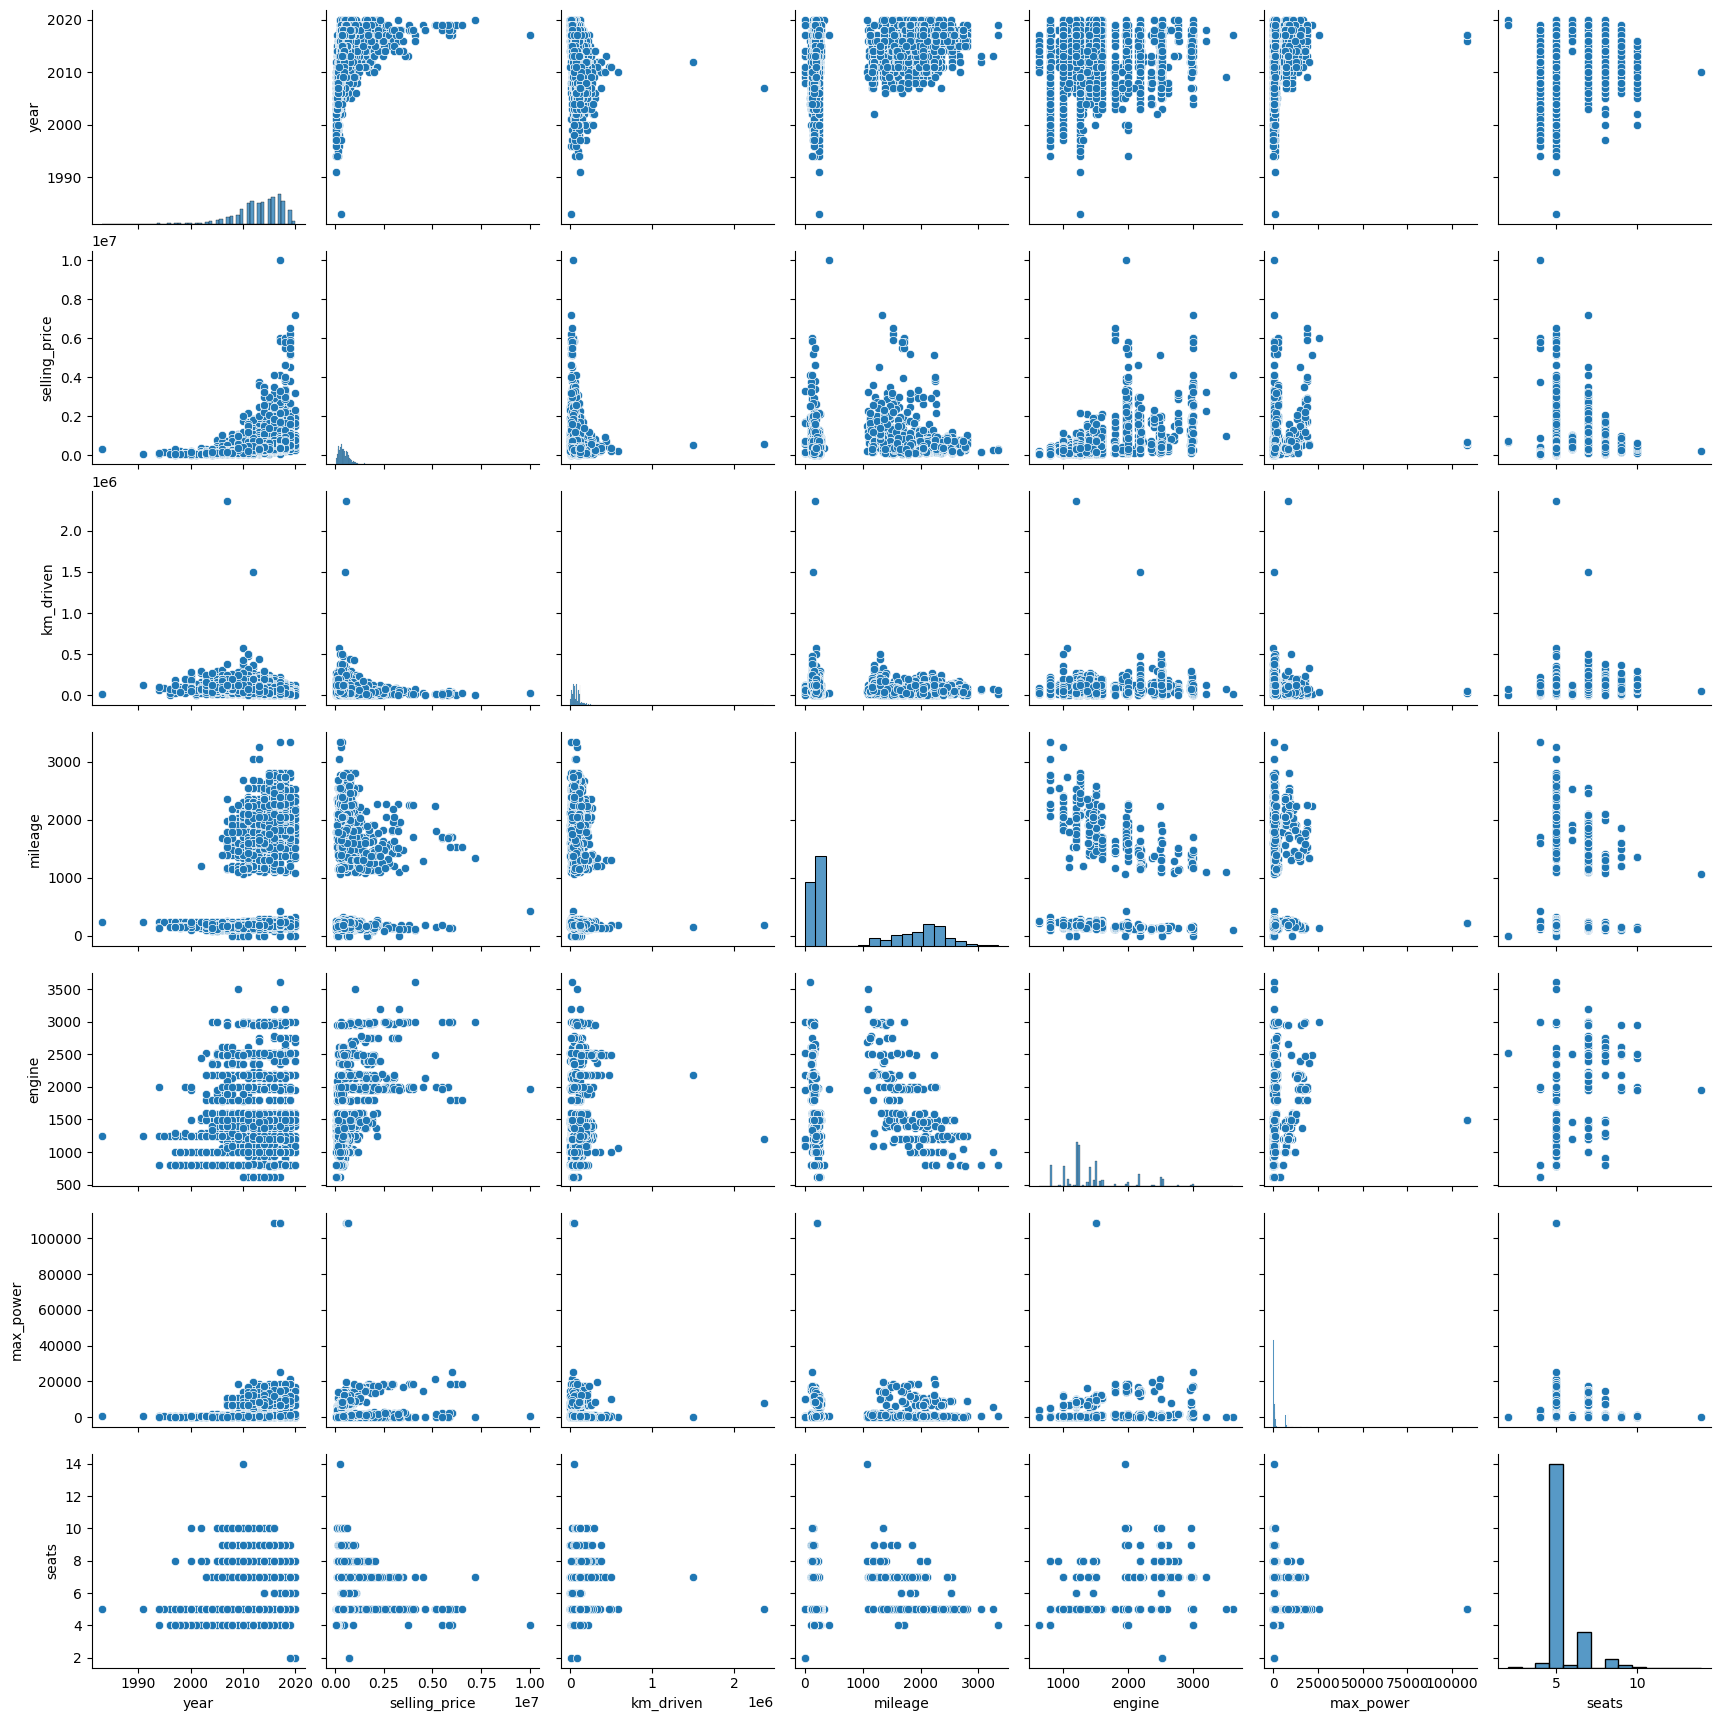

In [9]:
# Задание 6 (0.5 балла)

import seaborn as sns

sns.pairplot(df_train)

# Можно ли предположить на основе распределений связь признаков с целевой переменной?
# На графиках видна зависимость целевой переменной от года машины (чем новее тем больше цена), от пробега (чем больше пробег, тем меньше цена) и от мощности двигателя (чем больше мощность тем больше цена)

# Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
# Видны корреляции признаков max_power и engine, max_power и year, mileage и engine

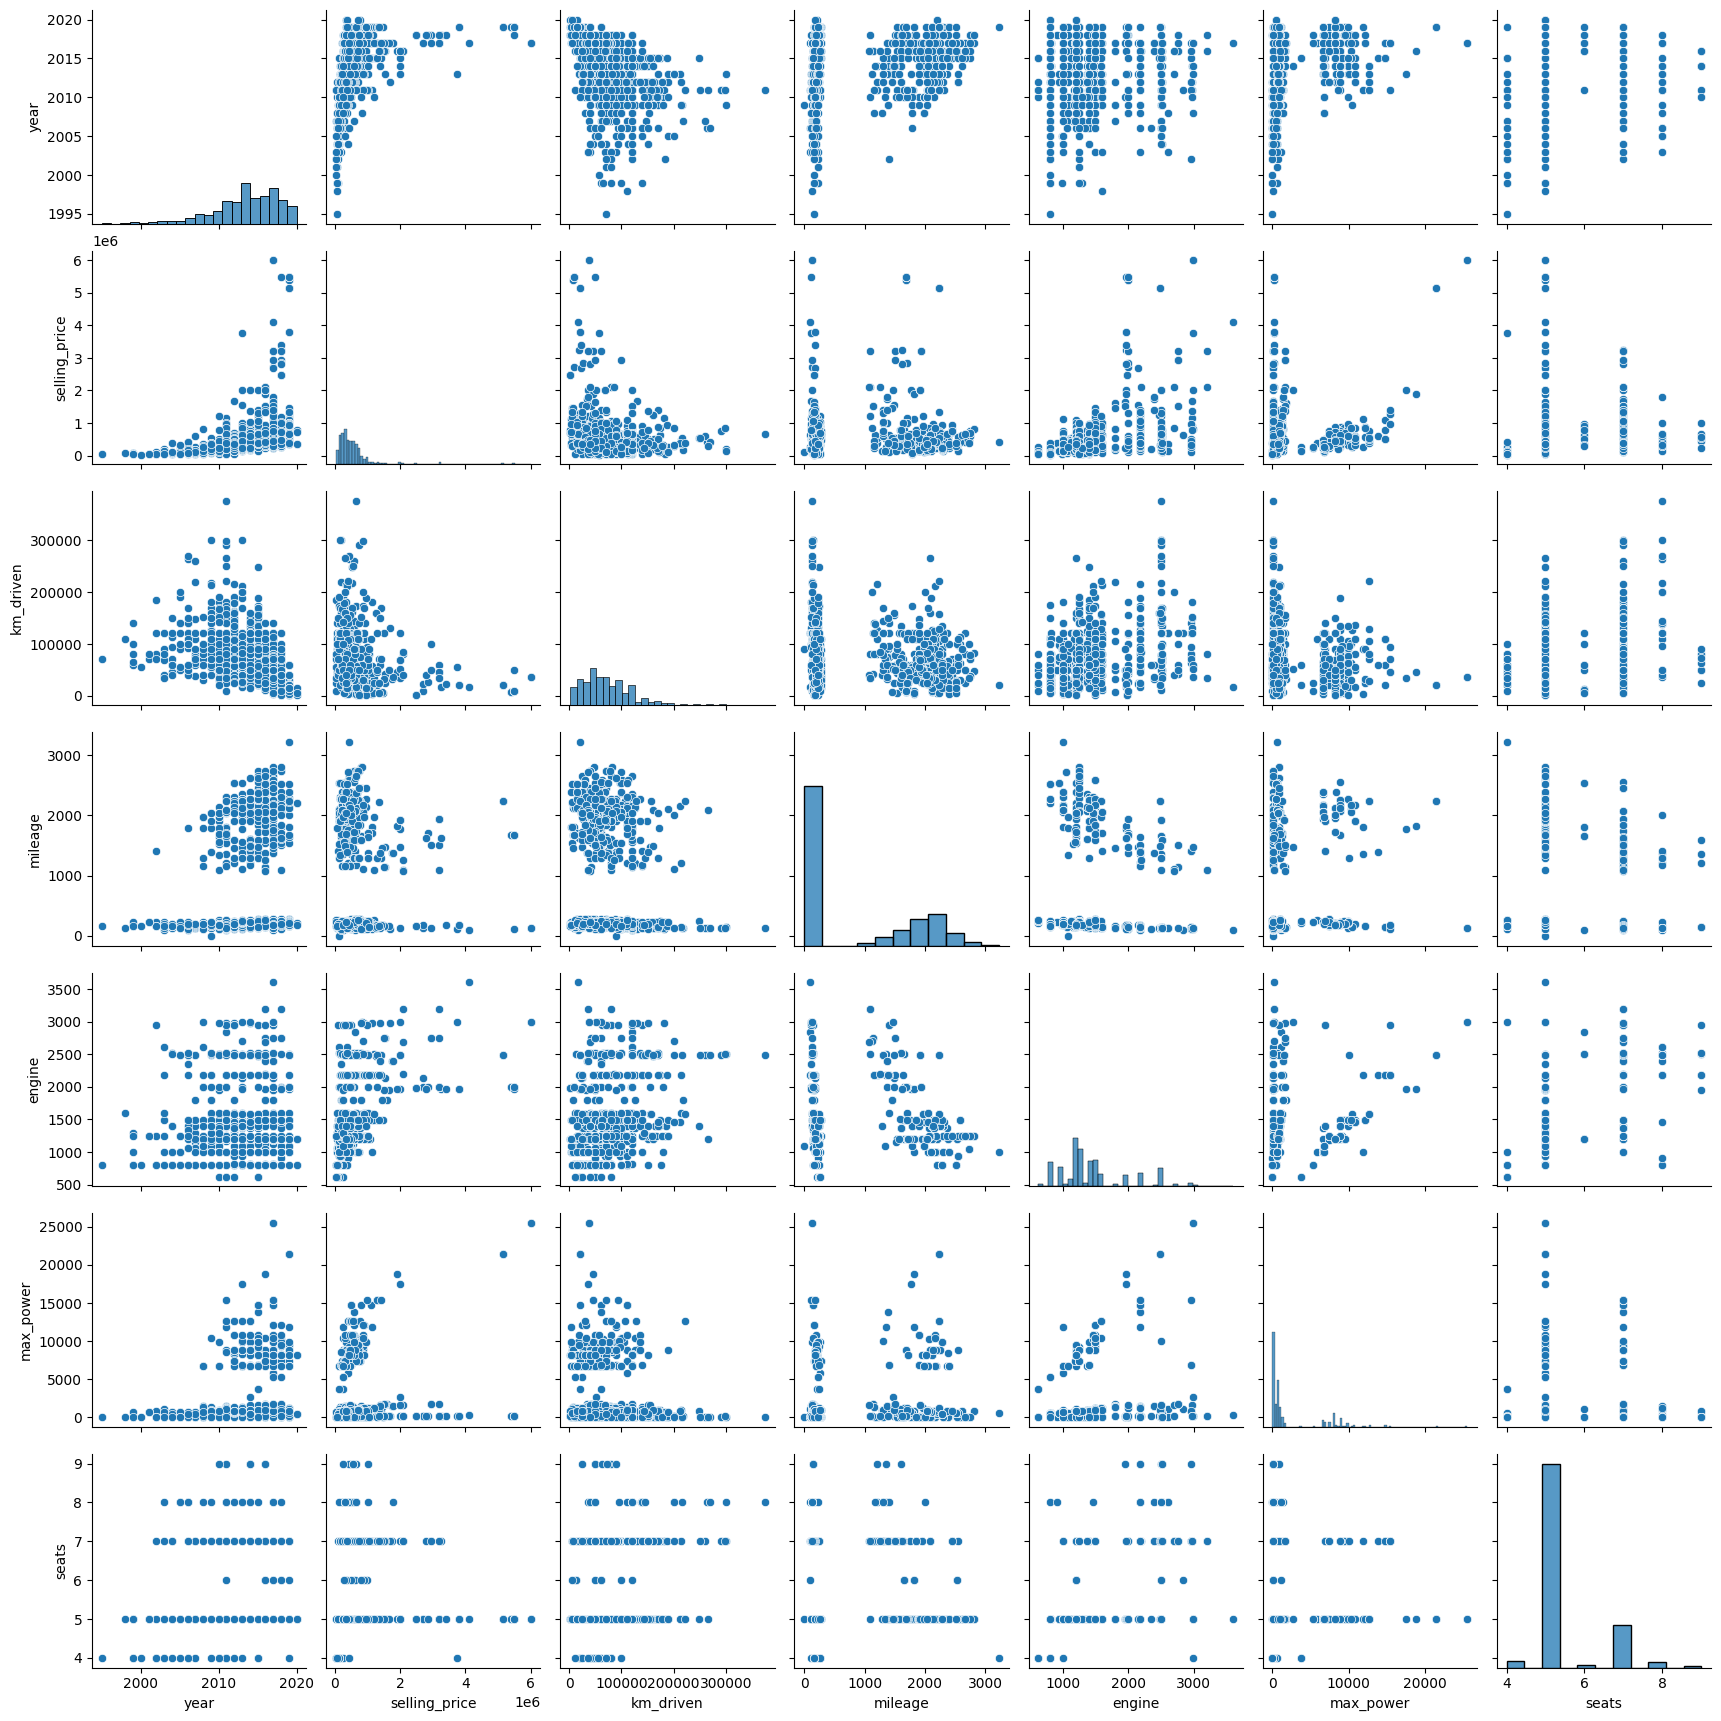

In [10]:
sns.pairplot(df_test)

# Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"
# Вузально зависимости между переменными схожи в train и test

Корреляции:
                    year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.293841  0.002819   
selling_price  0.427279       1.000000  -0.164828  0.078939  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.090705  0.229766   
mileage        0.293841       0.078939  -0.090705  1.000000 -0.043598   
engine         0.002819       0.447672   0.229766 -0.043598  1.000000   
max_power      0.249742       0.162894  -0.106671  0.111587  0.009021   
seats          0.041178       0.149953   0.192328  0.007511  0.652172   

               max_power     seats  
year            0.249742  0.041178  
selling_price   0.162894  0.149953  
km_driven      -0.106671  0.192328  
mileage         0.111587  0.007511  
engine          0.009021  0.652172  
max_power       1.000000 -0.073755  
seats          -0.073755  1.000000  
Heatmap:
 Axes(0.125,0.11;0.62x0.77)


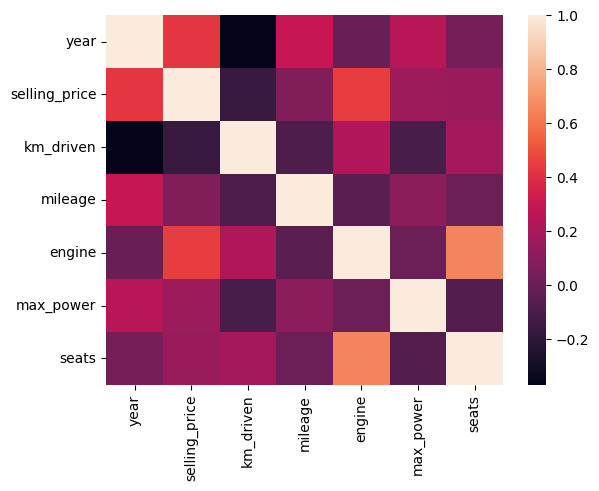

In [11]:
# Задание 7 (0.5 балла)

# Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()
corr =  df_train.corr(numeric_only = True)
print("Корреляции:\n", corr)

# По полученным корреляциям постройте тепловую карту (heatmap из бибилотеки seaborn)
print("Heatmap:\n", sns.heatmap(corr))

# Какие 2 признака наименее скоррелированы между собой?
# engine - year

# Между какими наблюдается довольно сильная положительная линейная зависимость?
# seats - engine

# Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
# Да, коэфф кореляции -0.368966

Распределение логарифма целевой переменной в train:
Распределение логарифма целевой переменной в tratestn:


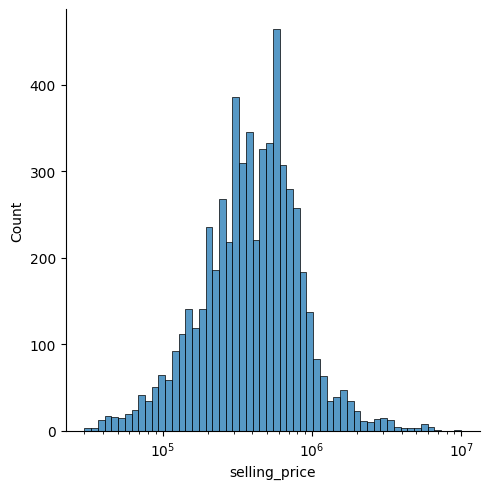

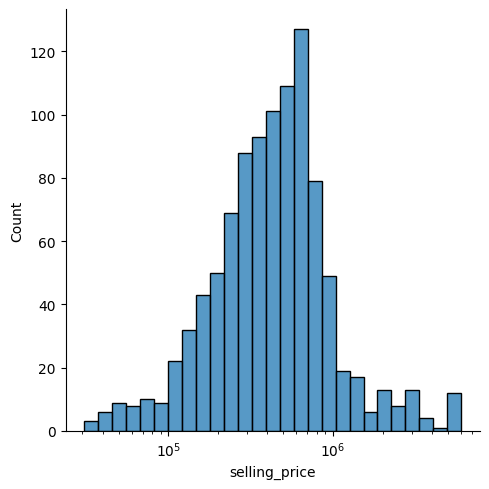

In [12]:
# Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

# Неплохо например посмотреть распределение целевой переменной в train и test
print("Распределение логарифма целевой переменной в train:\n", sns.displot(df_train['selling_price'], log_scale=True))
print("Распределение логарифма целевой переменной в tratestn:\n", sns.displot(df_test['selling_price'], log_scale=True))

# Видно, что распределения похожи, что говорит о том, что данные в целом подобраны корректно

In [13]:
# Задание 8 (0.05 балла)
df_train_copy = df_train.select_dtypes(include=['number'])
df_test_copy = df_test.select_dtypes(include=['number'])

X_train = df_train_copy.drop('selling_price', axis=1)
y_train = df_train_copy['selling_price']
assert X_train.shape == (5840, 6)

X_test = df_test_copy.drop('selling_price', axis=1)
y_test = df_test_copy['selling_price']
assert X_test.shape == (1000, 6)


In [14]:
# Задание 9 (0.2 балла)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

predict = linear_model.predict(X_test)

print(f'''Metrics:
R2 = {r2_score(y_test, predict)}
mse = {MSE(y_test, predict)}
''')

# Сделайте выводы по значениям метрик качества.
# R2 = 0.43 говорит о среднем качестве модели

Metrics:
R2 = 0.4331586458345933
mse = 325836596891.04065



In [15]:
# Задание 10 (0.15 балла)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
#y_train_scaled = scaler.transform(y_train)
X_test_scaled = scaler.transform(X_test)
#y_test_scaled = scaler.transform(y_test)

linear_model_scaled = LinearRegression()

linear_model_scaled.fit(X_train_scaled, y_train)

train_predict_scaled = linear_model_scaled.predict(X_train_scaled)
test_predict_scaled = linear_model_scaled.predict(X_test_scaled)

print(f'''Metrics:
R2 = {r2_score(y_test, test_predict_scaled)}
train mse = {MSE(y_train, train_predict_scaled)}
test mse = {MSE(y_test, test_predict_scaled)}
''')

Metrics:
R2 = 0.4331586458345922
train mse = 161060169619.19708
test mse = 325836596891.0413



In [16]:
# Задание 11 (0.1 балла)

columns = X_train.columns
weigths = linear_model_scaled.coef_
print("Веса:", weigths)
print(columns)

# Какой признак оказался наиболее информативным в предсказании цены?
# engine

Веса: [ 209688.40346792  -62316.77845838  -10771.05831624  343540.10321479
   16035.87042862 -139150.08734466]
Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')


In [17]:
# Задание 12 (0.25 балла)

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_predict = lasso.predict(X_test_scaled)

train_predict_lasso = lasso.predict(X_train_scaled)
test_predict_lasso = lasso.predict(X_test_scaled)

print(f'''Metrics:
R2 = {r2_score(y_test, test_predict_lasso)}
train mse = {MSE(y_train, train_predict_lasso)}
test mse = {MSE(y_test, test_predict_lasso)}
''')

# Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.
# Не занулила. Вероятно потому что слишком маленький коэффициент регуляризации для таких больших весов
weigths = lasso.coef_
print("Веса:", weigths)

Metrics:
R2 = 0.43315703272724293
train mse = 161060169628.60565
test mse = 325837524151.2089

Веса: [ 209687.37298651  -62315.95338599  -10769.76716962  343537.17894451
   16035.30154935 -139147.34812309]


In [25]:
# Задание 13 Финальный рывок (0.5 балла)

# Ваша задача 1
from sklearn.model_selection import GridSearchCV
import numpy as np

alpha_range = np.arange(1000.0, 100000.0, 500.0)
param = {'alpha':alpha_range}

n_fold = 10
grid_lasso = GridSearchCV(Lasso(), param, cv=n_fold, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)

# Сколько грид-сёрчу пришлось обучать моделей?
print("Число обученных моделей:", len(alpha_range) * n_fold) # 1980

# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
print("Лучший параметр регуляризации:", grid_lasso.best_params_) # {'alpha': 16000.0}
print("Веса лучшей модели", grid_lasso.best_estimator_.coef_) # mileage занулился

Число обученных моделей: 1980
Лучший параметр регуляризации: {'alpha': 16000.0}
Веса лучшей модели [195936.90819908 -48957.81057087     -0.         296291.23737228
   7372.68077919 -95058.57681043]


In [26]:
# Ваша задача 2

from sklearn.linear_model import ElasticNet

alpha_range = np.arange(0.01, 1.0, 0.01)
l1_ratio_range = np.arange(0.01, 1, 0.1)
param = {'alpha':alpha_range, 'l1_ratio': l1_ratio_range }

n_fold = 10
grid_elastic = GridSearchCV(ElasticNet(), param, cv=n_fold, scoring='r2')
grid_elastic.fit(X_train_scaled, y_train)

# Сколько грид-сёрчу пришлось обучать моделей?
print("Число обученных моделей:", len(alpha_range) * len(l1_ratio_range) * n_fold) # 1980

# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
print("Лучший параметр регуляризации:", grid_elastic.best_params_) # {'alpha': 0.42, 'l1_ratio': 0.81}
print("Веса лучшей модели", grid_elastic.best_estimator_.coef_)
print("R2 лучшей модели", grid_elastic.best_score_)

Число обученных моделей: 9900
Лучший параметр регуляризации: {'alpha': 0.42000000000000004, 'l1_ratio': 0.81}
Веса лучшей модели [191365.80230792 -59672.69500122  -7767.53953727 292486.2706019
  22317.58153235 -97395.02046774]
R2 лучшей модели 0.4314547071897229


In [27]:
# Задание 14 (0.1 балла) Проанализируйте столбец name. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

df_train['name'] = df_train['name'].astype('category')
df_test['name'] = df_test['name'].astype('category')

X_train_cat = df_train.drop('selling_price', axis=1)
y_train_cat = df_train['selling_price']

X_test_cat = df_test.drop('selling_price', axis=1)
y_test_cat = df_test['selling_price']

assert X_train_cat.shape == (5840, 11) # name оставил

In [28]:
# Задание 15 (0.4 балла)

from sklearn.preprocessing import OneHotEncoder

# print(X_train_cat.select_dtypes(include=['object', 'category']))

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)
X_train_encoded = encoder.transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

In [29]:
# Задание 16 (0.25 балла)

from sklearn.linear_model import Ridge

alpha_range = np.arange(410.0, 420.0, 0.1)
param = {'alpha':alpha_range}

n_fold = 10
grid_ridge = GridSearchCV(Ridge(), param, cv=n_fold, scoring='r2')
grid_ridge.fit(X_train_encoded, y_train)

# Сколько грид-сёрчу пришлось обучать моделей?
print("Число обученных моделей:", len(alpha_range) * n_fold) # 1980

# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
print("Лучший параметр регуляризации:", grid_ridge.best_params_) # {'alpha': 16000.0}
print("R2:", grid_ridge.best_score_)

# Ответье на вопрос: Удалось ли улучшить качество прогнозов?
# Да, качество модели улучшилось (R2 увеличился приблизительно на 0.03)


Число обученных моделей: 1000
Лучший параметр регуляризации: {'alpha': 410.0}
R2: 0.46529974171683897


In [34]:
# Задание 17 (0.5 балла)

from sklearn.metrics import make_scorer

def business_metric(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  # Вычисляем относительное отклонение
  deviation = np.abs(y_true - y_pred) / y_true

  # Считаем долю предсказаний с отклонением <= 10%
  return np.mean(deviation <= 0.1)

predict_lasso = grid_lasso.predict(X_test_scaled)
predict_elastic = grid_elastic.predict(X_test_scaled)
predict_ridge = grid_ridge.predict(X_test_encoded)

print("Доля предсказаний с отклонением <= 10% для Lasso модели:", business_metric(y_test, predict_lasso))
print("Доля предсказаний с отклонением <= 10% для ElasticNet модели:", business_metric(y_test, predict_elastic))
print("Доля предсказаний с отклонением <= 10% для Ridge модели:", business_metric(y_test_cat, predict_ridge))

# Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса
# Лучшая - Ridge

Доля предсказаний с отклонением <= 10% для Lasso модели: 0.209
Доля предсказаний с отклонением <= 10% для ElasticNet модели: 0.198
Доля предсказаний с отклонением <= 10% для Ridge модели: 0.214
